In [ ]:
!pip install goap-ai

In [ ]:
# AI, GOAP
from goap.action import Action
from goap.planner import RegressivePlanner

# copying the state of the world for reflection
import copy

# formatting reflective diary entries
import pprint

# defines action status
from enum import Enum

# The Technical Environment

The technical environment is a network of smart things integrated using a central message queue. Every smart thing participating in the network must be capable of publishing and subscribing to a central message queue. Smart things must use messages to and from the queue to coordinate their actions. Each smart thing must be capable of making itself known to other participants in the network. They must also be capable of reading and contributing to the collective state of the network-- a shared world view. Every smart thing must be capable of taking action, communicating the success or failure of the action, and updating the shared world view based on the outcome of that acton.

The SDK provides (and hides from smart-thing developers) the infrastructure integration required of all smart things. The SDK takes care of publishing and subscribing to a central message queue. The SDK (specifically, the AI known as CHARLIE) determines when to call an action. The SDK handles registering smart things and making them known in the network. It handles reading and updating the shared world view. With the SDK, the smart thing developer need only include the appropriate SDK classes and implement the appropriate custom behavior.

![1573183946[1].jpg](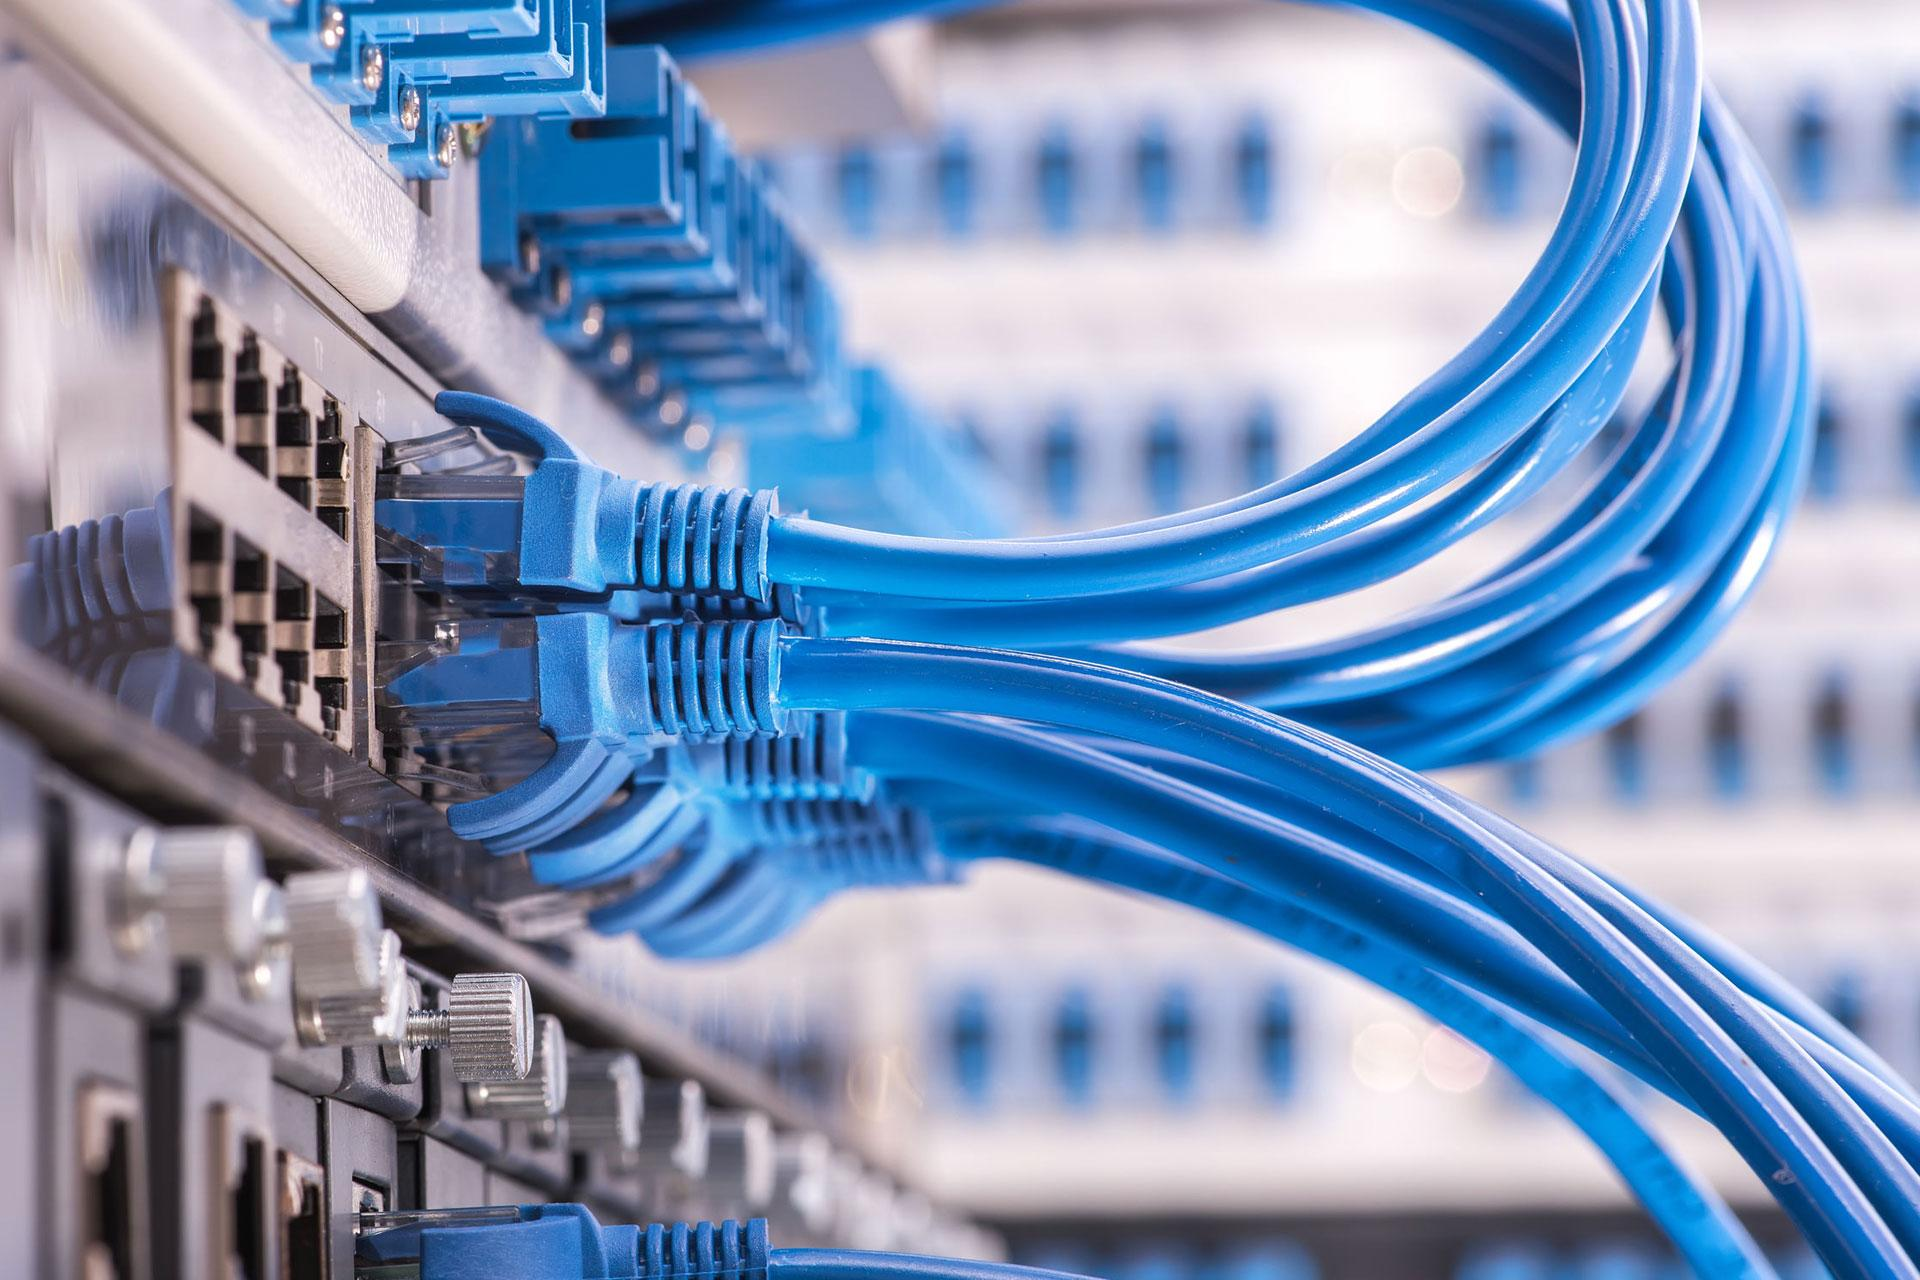)

In [ ]:
class AIaction(Action):
  # the effect that the action actually had on the world
  actual_effects = {}

  def __init__(self):
    # an action integrates itself with the communication infrastructure
    self.__integrate()

  def __integrate(self):
    # this is where we will put the code to connect with the (AWS) infrastructure
    # as part of integration, an action registers itself as a capability for charlie
    capabilities.append(self)

  def __update_the_world(self, update):
    # an action handles alerting the network of changes that it made
    # this is where we will put code to publish messages to the (AWS) infrastructure
    the_world_GLOBAL_VARIABLE.update(update)

  def act(self):
    # every AI action runs custom behavior, updates the world, and returns a result
    self.actual_effects = self.behavior()
    self.__update_the_world(self.actual_effects)
    return self.actual_effects
  
  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

class ActionStatus(Enum):
  SUCCESS = 'success'
  FAIL = 'fail'


# The SDK

The SDK is a set of classes that represent all meaningful actions that can be taken by smart things in the network. Every meaningful action that can be taken by a smart thing has (or should have) a corresponding SDK class. A major challenge for the future development of the SDK will be defining all actions and defining corresponding action classes.

A smart thing participates in the network by implementing action classes. Specifically, the developer implements custom behavior of the action class. As part of the SDK, the acton class tells the AI the intended effect of the action and the preconditions for executing the action. The AI uses this information to organize actions into plans for accomplishing goals.


![What-is-an-SDK-Blog_header-e1551340085509[1].png](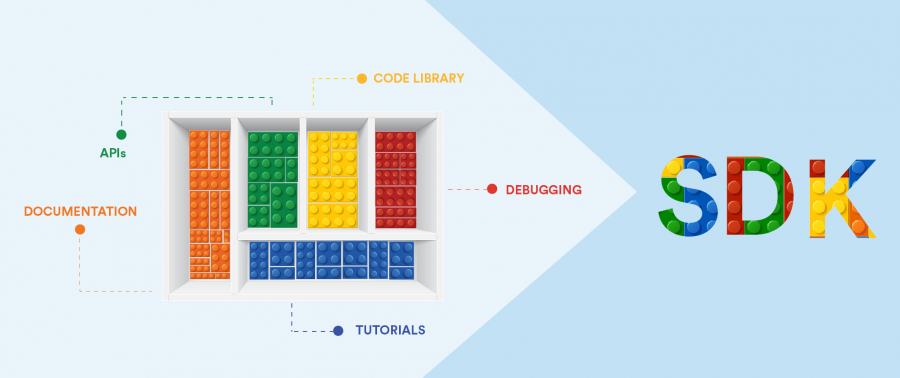)

In [ ]:
class MonitorBodyTemperature(AIaction):
  effects = {"is_body_temperature_monitored": True, "is_room_temperature_comfortable": False}
  preconditions = {"is_body_temperature_monitored": False, "log_body_temperature_data": "Body temperature data logged"}

  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

class ChangeRoomTemperature(AIaction):
  effects = {"is_room_temperature_comfortable": True}
  preconditions = {"is_room_temperature_change_authorized": True, "alert_care_provider": "Room temperature has changed"}

  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

class AuthorizeRoomTemperatureChange(AIaction):
  effects = {"is_room_temperature_change_authorized": True}
  preconditions = {"is_room_temperature_comfortable": False}

  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

class AlertCareProvider(AIaction):
  effects = {"alert_care_provider": ...}
  preconditions = {}

  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

class LogBodyTemperatureData(AIaction):
  effects = {"log_body_temperature_data": ...}
  preconditions = {}

  def behavior(self):
    # custom behavior must be specified by anyone implementing an AI action
    raise NotImplementedError

# CHARLIE

CHARLIE is the artificial intelligence that provides communication and intelligent orchestration of every smart thing in the network. CHARLIE's AI is based on Goal-Oriented Action Programming (GOAP). GOAP is a technique often applied to providing intelligent behavior to non-player characters in video games. Being based on GOAP, CHARLIE's AI is goal-driven, rather than data driven. CHARLIE'S intelligence comes from his ability to organize dynamic lists of actions into plans that achieve goals, rather than his ability to learn from large data sets.

CHARLIE is given a static set of goals designed to maintain Peter's wellbeing. CHARLIE's intelligence is organized into three levels of brain function. In the lowest level, CHARLIE percieves the environment, decides which of his goals are not met, and chooses a goal to pursue. In the mid-level brain function, CHARLIE reasons about his goal and organizes his available resources into a plan. In the highest-level brain function, CHARLIE acts on his plan, monitors the results his actions have and reflects on the entire process. 

The highest-level brain functions are where CHARLIE directs individual smart things in the network to take a specific action. In this way, CHARLIE is intelligent middleware and orchestration layer of the network. Without CHARLIE, individual smart things are largely passive and disconnected.

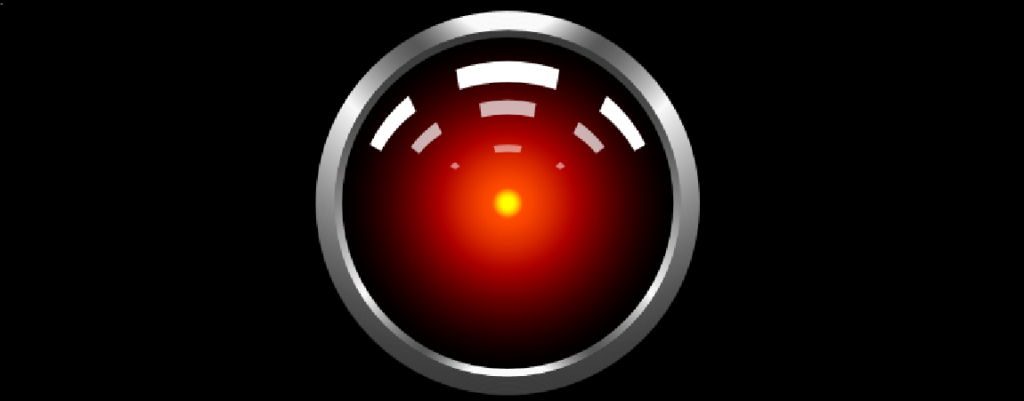

In [ ]:
# throughout his life, charlie will pursue the following goals
goals = {"is_room_temperature_comfortable": True}

# these are the things charlie is capable of doing
capabilities = []

# set the current state of the world
# a global variable is used to simulte a central message queue
the_world_GLOBAL_VARIABLE = {}

# this function returns the current state of the world
# here is where we put code to read from the (AWS) infrastructure
def get_world_state():
  return the_world_GLOBAL_VARIABLE

def select_goal(prioritized_goals):
  # the default is to select an empty goal
  selected_goal = {}

  # go through goals in priority order
  for goal in prioritized_goals:
    # find a goal that is not realized in the world
    the_goal_is_not_met = prioritized_goals[goal] != get_world_state()[goal]
    if the_goal_is_not_met:
      # select the first (highest priority) unrealized goal
      selected_goal = {goal: prioritized_goals[goal]}
      break

  return selected_goal

def perceive():
  goal = select_goal(goals)
  world_state_snapshot = copy.copy(get_world_state())
  return goal, world_state_snapshot

def reason(goal, world_state): 
  planner = RegressivePlanner(world_state, capabilities)
  plan = planner.find_plan(goal)
  return plan

def act(plan):
  # we are optimistic and asuume the plan will succeed
  action_status = ActionStatus.SUCCESS

  # walk through the plan and execute it
  for action in plan:
    action.action.act()
    # compare intended and actual effects, break if the plan is not working
    plan_is_not_working = action.action.effects != action.action.actual_effects
    if plan_is_not_working:
      action_status = ActionStatus.FAIL
      break

  world_state_after = get_world_state()
  return action_status, world_state_after

def reflect(goal, world_state_before, plan, action_status, world_state_after):
  diary_entry = {
      "my_goal": goal,
      "the_world_state_before": world_state_before,
      "my_plan": plan,
      "action_status": action_status,
      "the_world_state_after": world_state_after
  }
  return diary_entry

def run_charlie(diary):
  # low-level brain function: perception
  goal, world_state_before = perceive()

  # middle-level brain function: reasoning and planning
  plan = reason(goal, world_state_before)

  # high-level brain function: action and introspection
  action_status, world_state_after = act(plan)
  diary_entry = reflect(goal, world_state_before, plan, action_status, world_state_after)
  diary.append(diary_entry)

# A Developer Community

The goal is to harness the wisdom and capacity of a large, distributed developer community over long periods of time. We should benefit from the contribution of developers regardless of how much code they contribute or how long they choose to participate. We should be able to aggregate individual contributions into a coherent whole without requiring that each individual think about the whole.

The SDK is designed to let each developer choose and focus on solving a small, specific problem. The SDK automatically collects those individual solutions into a coherent, working application. This means that even work done during a hackathon by short-term participants will have a long-term benefit to the program.

![20150412_HACKATHON-slide-2OP2-superJumbo[1].jpg](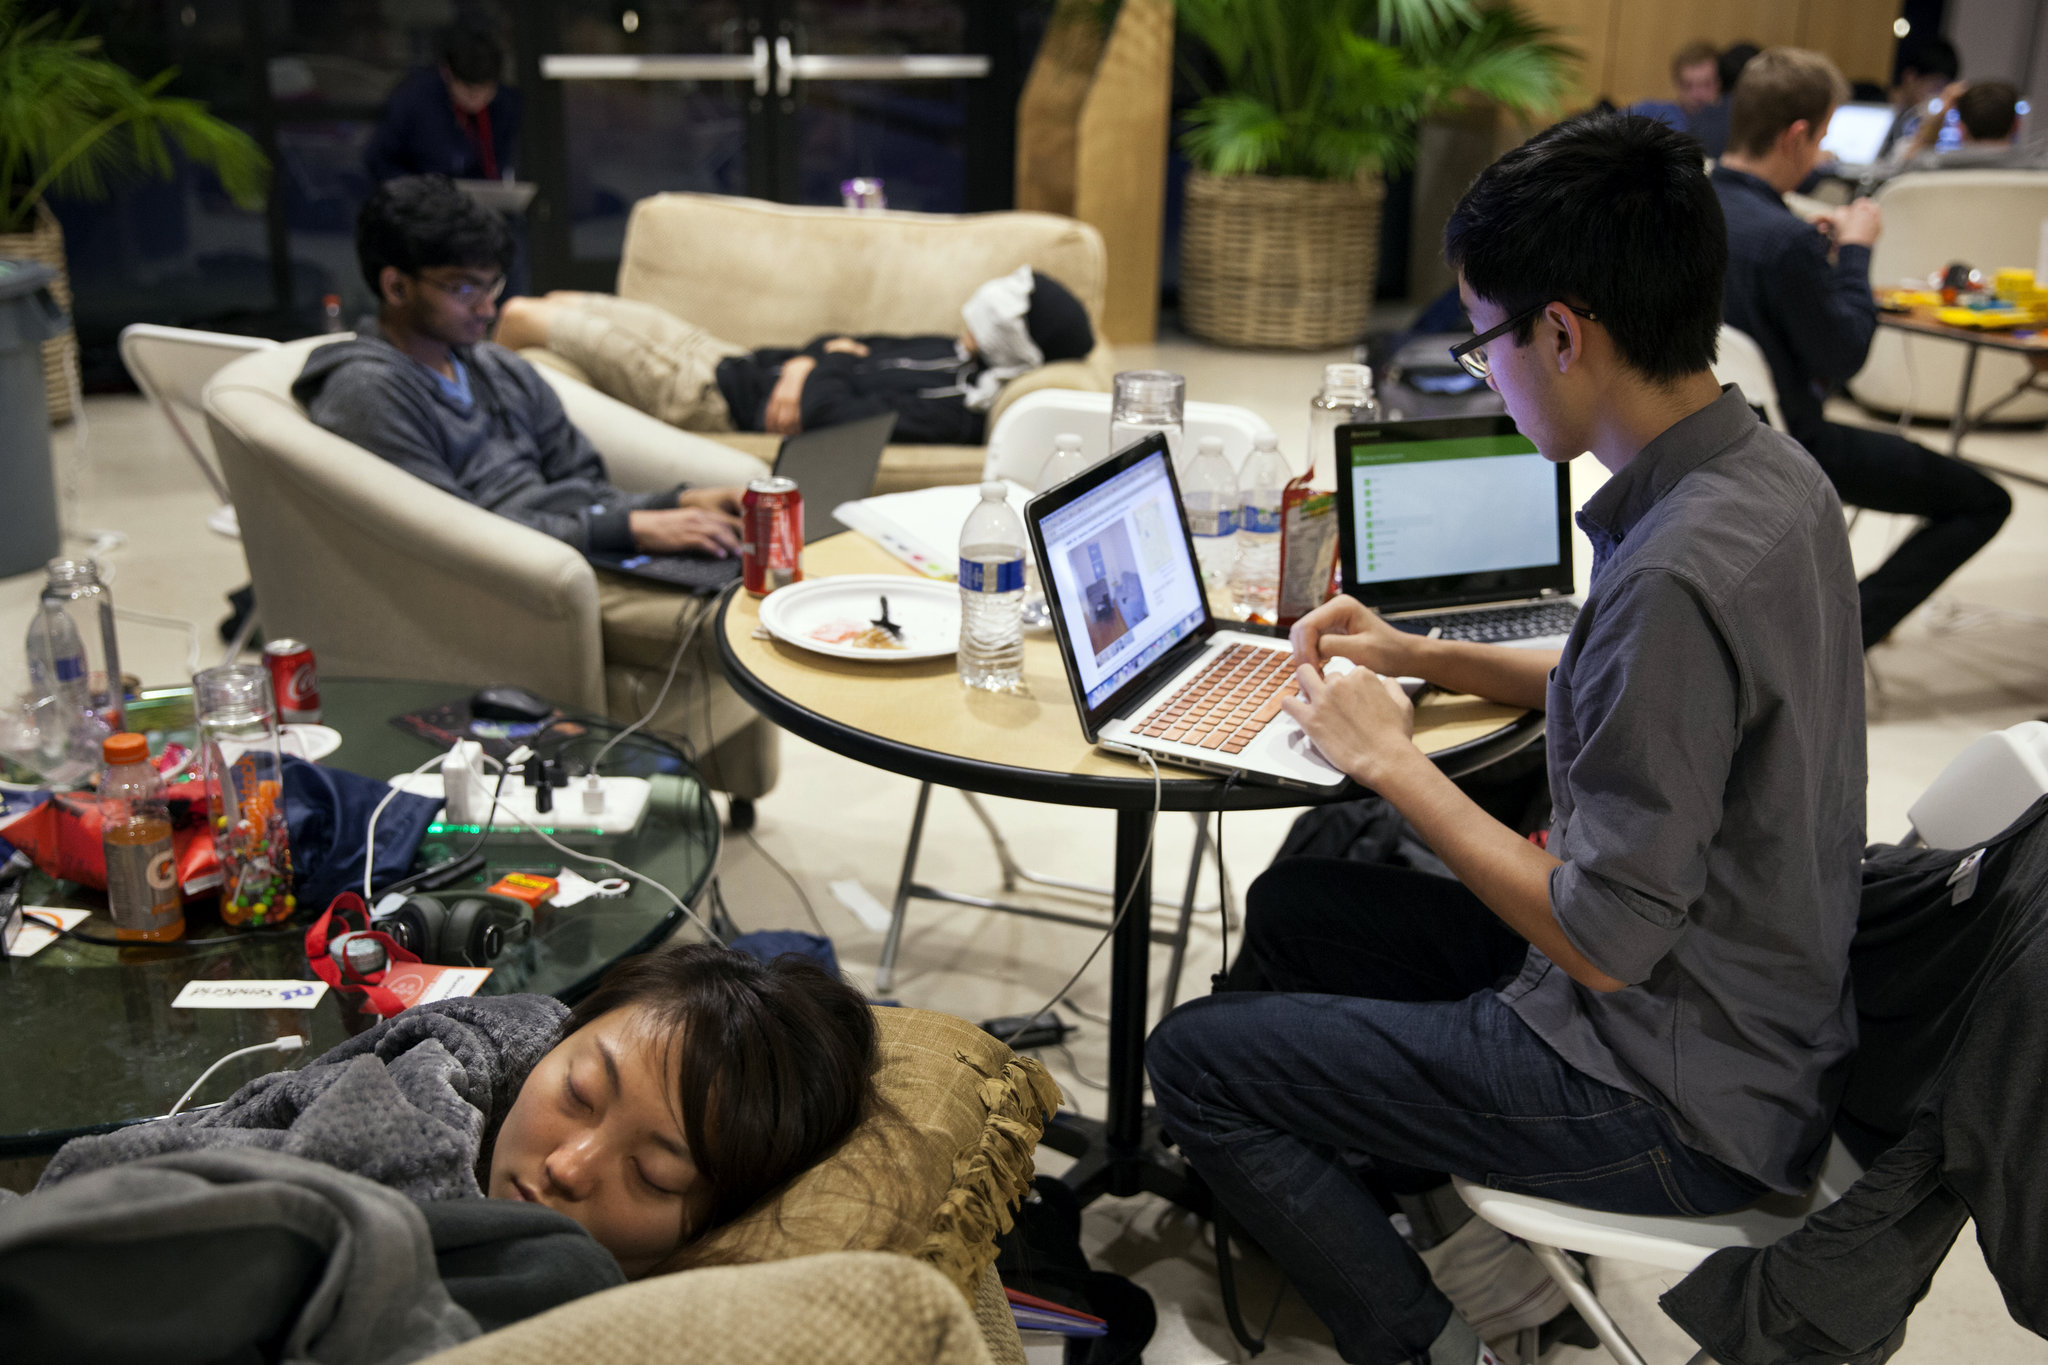)

In [ ]:
#from charlie import ChangeRoomTemperature, AuthorizeRoomTemperatureChange, AlertCarProvider, LogBodyTemperatureData

# hack together simulations of thermometers, UIs, etc
# launch the simulations

class SimulatedMessagingApp(AlertCareProvider):
  def behavior(self):
    print("Tell Francis that the room temperature will be raised because Peter is cold")
    return self.effects
SimulatedMessagingApp()

class SimulatedSmartThermometer(ChangeRoomTemperature):
  def behavior(self):
    print("Turn up the heat and make the room a bit warmer")
    return self.effects
SimulatedSmartThermometer()

class SimulatedUserInterface(AuthorizeRoomTemperatureChange):
  def behavior(self):
    print("Ask Peter if he's okay with raising the temperature in the room")
    print("Peter gave the okay to raise the room's temperature")
    return self.effects
SimulatedUserInterface()

class SimulatedDataLogger(LogBodyTemperatureData):
  def behavior(self):
    print("In the data lake, make a place to store the history of Peter's body temperature")
    return self.effects
SimulatedDataLogger()

# Simple Integration
The SDK makes being an intelligent participant in the network is simple. Import the classes that represent the actions that your smart thing is capable of taking. Implement the custom behavior required of those action classes. The SDK handles the middleware communication with the infrastructure. CHARLIE decides when your action should be executed and runs the code at the appropriate time. All developers need to worry about is the specific behavior of their smart thing. 

The technical constraints on micro-service developers are kept to a minimum. You don't have to completely refactor your code to provide a micro-service that participates in the network. You only need to include the SDK and implement custom behaviors.

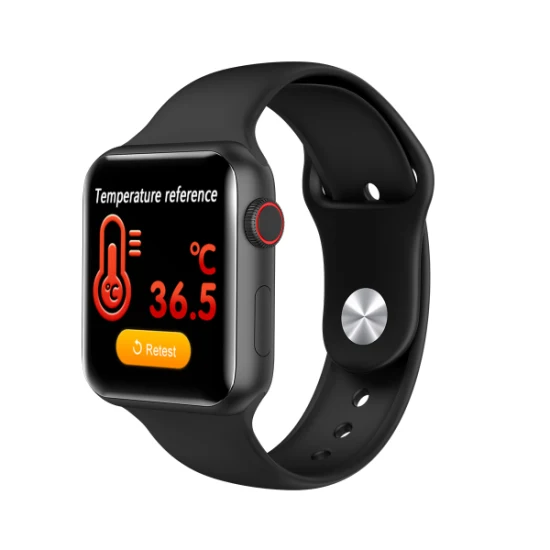

In [ ]:
#from charlie import MonitorBodyTemperature

class AcmeTemperatureMonitor(MonitorBodyTemperature):
  def behavior(self):
    print("The ACME temperature sensor is active on Peter's wrist")
    print("The ACME temperature sensor is keeping track of Peter's body temperature")
    return self.effects

AcmeTemperatureMonitor()


#Trustworthy AI

CHARLIE keeps a journal of his motivation, perception, and actions. Through reflection, he records his goals, the plans he made to accomplish the goals, the actions he took in executing the plan, and the effect these actions had on his world (Peter's environment). This record gives us the transparency we need to audit his actions and adjust his programming where needed.


![d41586-020-01826-3_18083400[1].jpg](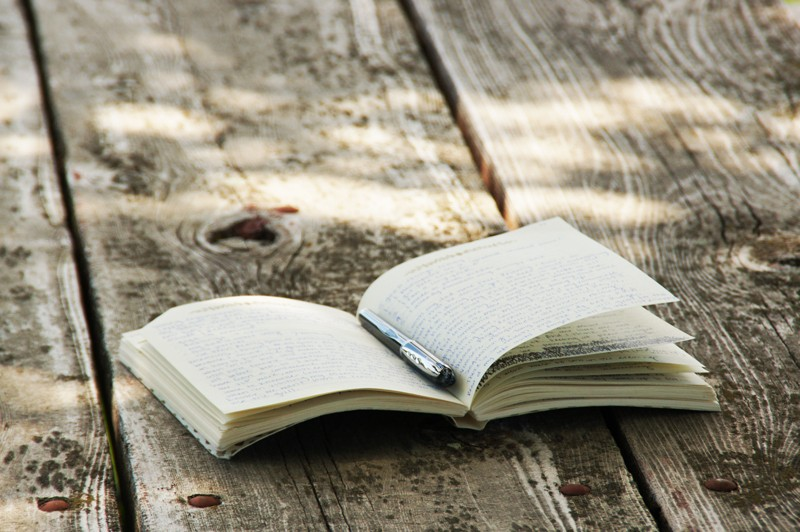)

In [ ]:
# review what charlie accomplished with his life
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(charlies_diary)

[   {   'action_status': <ActionStatus.SUCCESS: 'success'>,
        'my_goal': {'is_room_temperature_comfortable': True},
        'my_plan': [   PlanStep(action=<__main__.SimulatedDataLogger object at 0x7f7d3ece1e10>, services={}),
                       PlanStep(action=<__main__.AcmeTemperatureMonitor object at 0x7f7d39d78310>, services={}),
                       PlanStep(action=<__main__.SimulatedUserInterface object at 0x7f7d404fde10>, services={}),
                       PlanStep(action=<__main__.SimulatedMessagingApp object at 0x7f7d404fd890>, services={}),
                       PlanStep(action=<__main__.SimulatedSmartThermometer object at 0x7f7d404fdb50>, services={})],
        'the_world_state_after': {   'alert_care_provider': Ellipsis,
                                     'is_body_temperature_monitored': True,
                                     'is_room_temperature_change_authorized': True,
                                     'is_room_temperature_comfortable': True,
     

# An Intelligent Environment

The goal is to build an intelligent, automomous environment that looks after Peter's well being. The environment should constantly monitor, anticipate and adapt itself to Peter's changing needs. Each individual smart thing should collaborate toward that end. When CHARLIE is activated, he's given a set of goals. Throughout his life, he orchestrates smart things in pursuit of those goals. CHARLIE is constantly directing network participants to take actions on behalf of Peter.

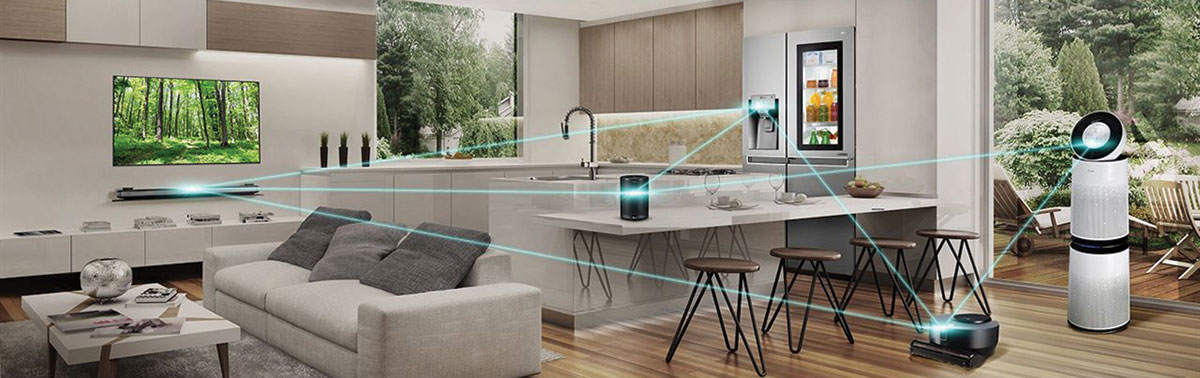

In [ ]:
# set up the circumstances of charlie's birth
the_world_GLOBAL_VARIABLE = {"is_body_temperature_monitored": False, "is_room_temperature_comfortable": False}
charlies_life_span_in_compute_cycles = 3
charlies_diary = []

# give charlie a lifespan
for cycle in range(charlies_life_span_in_compute_cycles):
  run_charlie(charlies_diary)

In the data lake, make a place to store the history of Peter's body temperature
The ACME temperature sensor is active on Peter's wrist
The ACME temperature sensor is keeping track of Peter's body temperature
Ask Peter if he's okay with raising the temperature in the room
Peter gave the okay to raise the room's temperature
Tell Francis that the room temperature will be raised because Peter is cold
Turn up the heat and make the room a bit warmer
